# Support Vector Regression

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path

## Load the dataset

In [2]:
raw_data_file_path = '/Users/vishalsaxena/Documents/DS_Workspace/udemy_ml_algo_python/data/raw'
dataset = pd.read_csv(os.path.join(raw_data_file_path, 'Position_Salaries.csv'))
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
X = dataset.iloc[:,1:-1].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [4]:
y = dataset.iloc[:,-1].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [5]:
y = np.reshape(y, (len(y),1))
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

## Visualize the dataset 

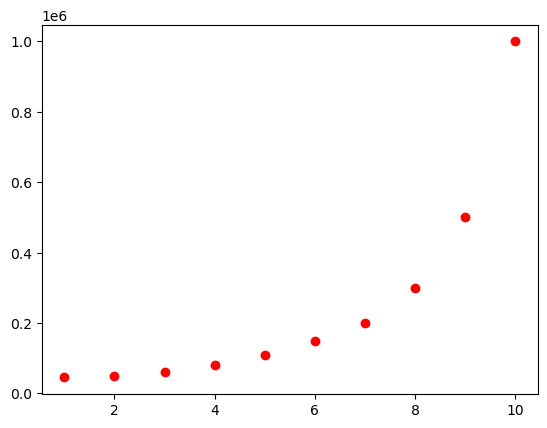

In [6]:
plt.scatter(X, y, color='red') # seems to be non-linear

## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [8]:
sc_y = StandardScaler()
y = sc_y.fit_transform(y)
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training the SVR model on whole dataset

In [11]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, np.squeeze(y))

SVR()

## Predicting new result with SVR model

In [12]:
y_pred = regressor.predict(sc_X.transform([[6.5]]))
y_pred

array([-0.27861589])

In [14]:
sc_y.inverse_transform(y_pred.reshape(-1,1))

array([[170370.0204065]])

## Visualising the SVR results with scaled value

Text(0.5, 1.0, 'Truth or Bluff')

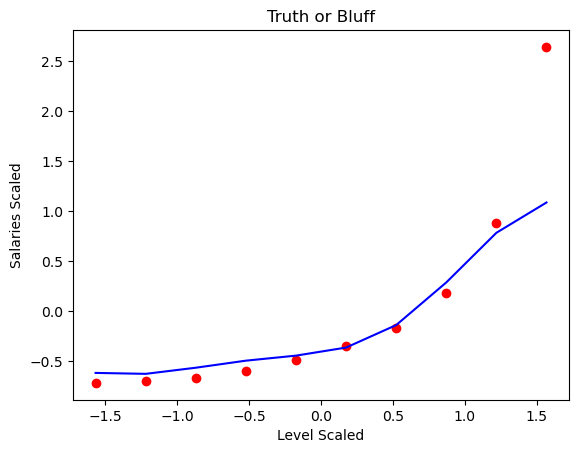

In [23]:
plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.xlabel('Level Scaled')
plt.ylabel('Salaries Scaled')
plt.title('Truth or Bluff')

## Visualising the SVR results with original value

Text(0.5, 1.0, 'Truth or Bluff')

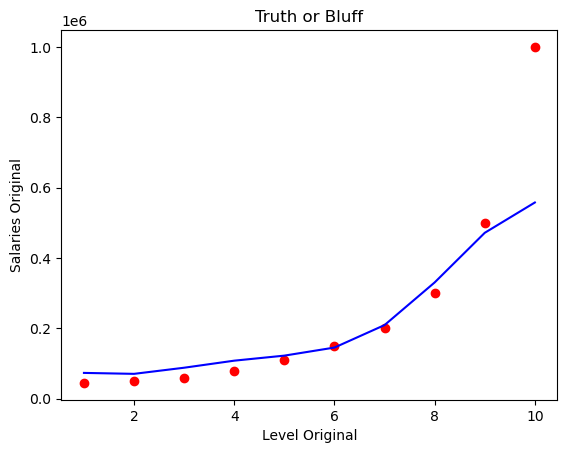

In [24]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color='blue')
plt.xlabel('Level Original')
plt.ylabel('Salaries Original')
plt.title('Truth or Bluff')

In [25]:
# from sklearn.metrics import mean_squared_error, r2_score
# print("Poly R2:", r2_score(y_true, y_poly_pred))
# print("SVR R2 :", r2_score(y_true, y_svr_pred))
# print("Poly MSE:", mean_squared_error(y_true, y_poly_pred))
# print("SVR MSE :", mean_squared_error(y_true, y_svr_pred))

NameError: name 'y_true' is not defined